In [1]:
%matplotlib inline
from ccount import *
from czifile import CziFile
from math import sqrt
from skimage import data, img_as_float
from skimage.draw import circle
from skimage import exposure
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage.transform import rescale, resize, downscale_local_mean
from IPython.display import clear_output
from random import randint
from time import sleep


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os.path
import re

## Parameters

In [75]:
ls ../test/*npy

../test/24_15x15.big.npy            ../test/27_20x20.small.npy
../test/24_15x15.small.labeled.npy  ../test/S0_0MMC_c.npy


In [3]:
ls *labeled.npy

ls: *labeled.npy: No such file or directory


In [84]:
# Please change
in_name = '../test/S0_0MMC_c.npy'

# Don't change unless have to
block_height = 2048 
block_width = 2048 # pixcels

blob_extention_ratio = 1.4 # extend blob radius manually (1.4)
blob_extention_radius = 2 # pixcels to extend (2)


# Load Pre-build crops (cropped images of blobs)

In [85]:
# load
image_flat_crops = load_blobs_db(in_name)

../test/S0_0MMC_c.npy read into RAM
2742 cropped blobs, 10000 pixcels in each blob
2742 unlabeled blobs


In [86]:
w = int(sqrt(image_flat_crops.shape[1]-6)) # padding width & cropped img width/2

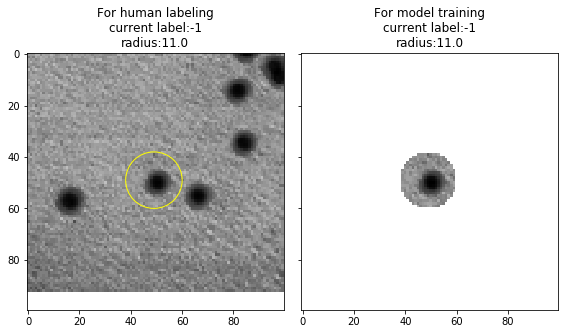

In [87]:
filtered = filter_blobs(blobs=image_flat_crops,r_min=10, r_max=50)
show_rand_crops(crops=filtered, label_filter='na', num_shown=1)

### Histogram of blob size

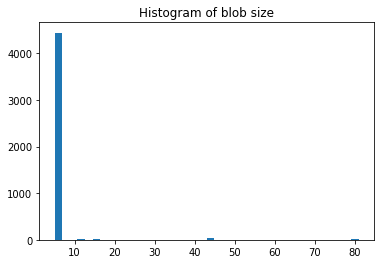

In [66]:
r_ = image_flat_crops[:,2]
plt.hist(r_, 40)
plt.title("Histogram of blob size")
plt.show()

## Labeling

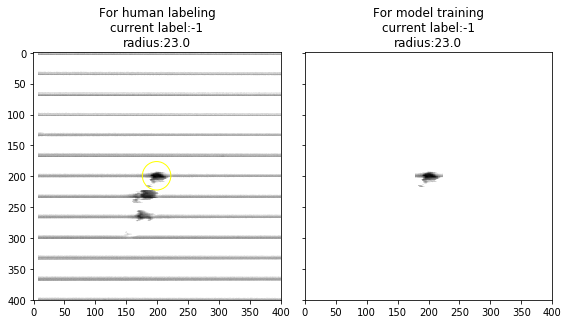

KeyboardInterrupt: 

In [8]:
image_flat_crops = pop_label_flat_crops(image_flat_crops, random = True, seed = 1, skip_labeled = True)

## Save

In [ ]:
# save
outname_labeled = input ("please input file name to save labeled data(e.g. {})\nto exit without saving 'e':".format("xxx.labeled.npy"))
if outname_labeled == 'e':
    print('exit without saving')
else:
    np.save(outname_labeled.strip(), image_flat_crops)  
    print('saved into', outname_labeled.strip())

# Review Labeled DB

In [ ]:
labeled = load_blobs_db(outname_labeled)

In [ ]:
## labeled as YES
show_rand_crops(crops=labeled, label_filter=1, num_shown=2)

In [ ]:
## labeled as NO
show_rand_crops(crops=labeled, label_filter=0, num_shown=2)

In [ ]:
## labeled as undistinguishable
show_rand_crops(crops=labeled, label_filter=-2, num_shown=2)

In [ ]:
## any label
show_rand_crops(crops=labeled, label_filter='na', num_shown=2)